In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
raw_data = pd.read_csv('data_norm_final_with_labels.csv',encoding='gb2312')
raw_data.head(2)

,V8,V9,V10,V18,V6,V12,V15,V19,V24,V14,V16,V22,V23,File_1,File_2,File,Sex,Age,Experience,email
0,-0.599426,0.519476,0.363223,-0.098822,0.266852,0.297594,1.307956,1.402624,0.455250,0.891573,0.748328,1.010635,0.97809,0.0,1.0,2,2,22,0,NaN
1,1.769904,1.676176,0.909692,0.965909,-0.283324,-0.819219,-0.792320,-0.294754,-0.688009,0.891573,1.301296,2.089076,2.10458,0.0,1.0,2,1,20,1,759912910@qq.com


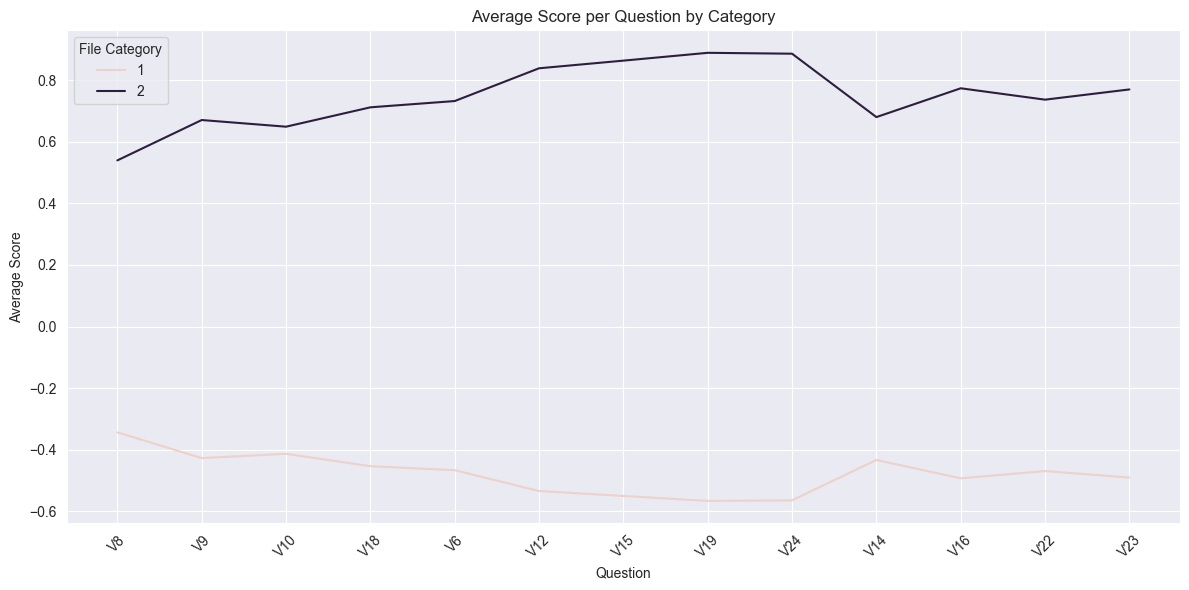

In [2]:

# Assuming raw_data is already loaded

# Extract columns starting with 'V'
item_columns = [col for col in raw_data.columns if col.startswith('V')]

# Group by 'File' and calculate mean
grouped = raw_data.groupby('File')[item_columns].mean()

# Reset index and melt to long format
grouped_reset = grouped.reset_index()
melted = pd.melt(grouped_reset, id_vars='File', var_name='Question', value_name='Score')

grouped_se = melted.groupby(['File', 'Question'])['Score'].agg(['mean', 'std', 'count'])
grouped_se['SE'] = grouped_se['std'] / np.sqrt(grouped_se['count'])
grouped_se = grouped_se.reset_index()

# Define standard error function
# Set plot style
sns.set_style('darkgrid')

# Create line plot with standard error
plt.figure(figsize=(12, 6))
sns.lineplot(x='Question', y='Score', hue='File', data=melted)

# Set titles and labels in English
plt.title('Average Score per Question by Category')
plt.xlabel('Question')
plt.ylabel('Average Score')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show legend
plt.legend(title='File Category')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()